# No-show appointments dataset analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This report investigates the **Kaggle no-show appointments** dataset, which collects information from over 100k medical appointments in Brazil.
> There are a number of patient characteristics included and the aim of the report is to compare and contrast the no-show cases with those who showed up for their appointments.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
# %config InlineBackend.figure_format = 'retina'  # high-resolution plots

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
# read the dataset
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# get dataset dimensions
df.shape

(110527, 14)

In [4]:
# show summary for all columns
df.describe(include = 'all')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
count,1.105270e+05,1.105270e+05,110527,110527,110527,110527.000000,110527,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527
unique,NaN,NaN,2,103549,27,NaN,81,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,F,2016-05-06T07:09:54Z,2016-06-06T00:00:00Z,NaN,JARDIM CAMBURI,NaN,NaN,NaN,NaN,NaN,NaN,No
freq,NaN,NaN,71840,24,4692,NaN,7717,NaN,NaN,NaN,NaN,NaN,NaN,88208
mean,1.474963e+14,5.675305e+06,NaN,NaN,NaN,37.088874,NaN,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,NaN
std,2.560949e+14,7.129575e+04,NaN,NaN,NaN,23.110205,NaN,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,NaN
min,3.921784e+04,5.030230e+06,NaN,NaN,NaN,-1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,4.172614e+12,5.640286e+06,NaN,NaN,NaN,18.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,3.173184e+13,5.680573e+06,NaN,NaN,NaN,37.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,9.439172e+13,5.725524e+06,NaN,NaN,NaN,55.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN


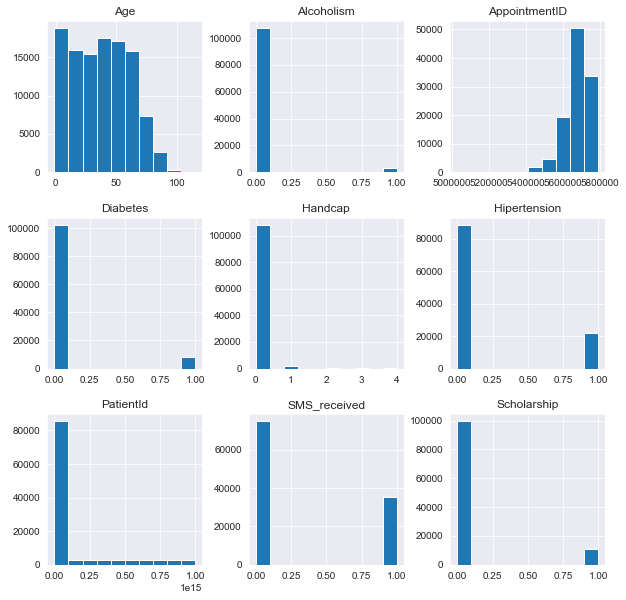

In [5]:
df.hist(figsize=(10,10));

In [6]:
# check for duplicates - there are none
print(df.duplicated().sum())

0


In [7]:
# how many different patients exist in the dataset
df.PatientId.nunique()

62299

In [8]:
# check that AppointmentID is a unique row identifier
df.AppointmentID.nunique()

110527

**AppointmentID** will not be interesting in our analysis, so let's drop it in the following Data Cleaning section.<br>
Let's rename mistyped column names such as **Hipertension** and **Handcap**.<br>
Let's also rename **SMS_received** and **No-show** to have a consistent column naming.<br>
<br>
Let's also further investigate the suspicious minimum and maximum values of **Age** and values of **Handcap**:

In [9]:
df['Age'].value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64

In [10]:
df[df['Age']==-1]
# age of -1 is obviously an error, let's change it to 0 in the next section

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [11]:
df.groupby(['Age', 'PatientId'])['Age'].count()
# there are actually just two patients aged 115, which might be plausible

Age   PatientId   
-1    4.659432e+14    1
 0    2.699191e+08    2
      3.424788e+08    1
      4.279622e+08    1
      1.192462e+09    1
                     ..
 100  5.578313e+13    1
 102  2.342836e+11    1
      9.762948e+14    1
 115  3.196321e+13    4
      7.482346e+14    1
Name: Age, Length: 63467, dtype: int64

In [12]:
df['Handcap'].value_counts()
# there are a few cases of more than one handicap, so handicap is a categorical variable, 
# where 4 means that a patient has 4 different handicaps

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

In [13]:
# check for missing values and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [14]:
# confirmation that there are no null values
df.isnull().sum().any()

False

There are no missing values, but there are issues with data types:<br>
- **Gender** and **Handicap** need to be transformed to category type.
- Day columns need to be transformed to datetime types.
- Boolean columns **Scholarship**, **Hypertension**, **Diabetes**, **Alcoholism**, **SMSReceived** should be converted to bool types.
- **NoShow** should also be transformed to bool type.
<br>
- **Neighbourhood** needs further investigation of its values and distribution to decide on the appropriate data type:


In [15]:
df['Neighbourhood'].value_counts()
# there are 81 places, some of them with large number of appointments, it makes sense to categorize it

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: Neighbourhood, Length: 81, dtype: int64

### Data Cleaning

Let's perform the cleaning steps which were outlined above.

In [16]:
# dropping AppointmentID column
df.drop(['AppointmentID'], axis=1, inplace=True)

In [17]:
# renaming mistyped columns
df.rename(columns={'Hipertension': 'Hypertension', 'Handcap': 'Handicap', 'SMS_received': 'SMSReceived', 'No-show': 'NoShow'},\
          inplace=True)

# confirm changes
df.head(5)

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow
0,2.987250e+13,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [18]:
# check for duplicates again after dropping ID column
print(df.duplicated().sum())

618


In [19]:
# show some of the duplicates
df_dup = df[df.duplicated()]
df_dup.head(5)

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow
154,1.925263e+10,F,2016-04-28T16:38:34Z,2016-04-29T00:00:00Z,30,ITARARÉ,0,0,0,0,0,0,No
369,4.341600e+14,F,2016-04-29T09:43:15Z,2016-04-29T00:00:00Z,39,PRAIA DO CANTO,0,0,0,0,0,0,No
371,4.497415e+09,F,2016-04-19T11:16:27Z,2016-04-29T00:00:00Z,11,BELA VISTA,0,0,0,0,0,0,No
466,5.161239e+12,F,2016-04-27T13:16:02Z,2016-04-29T00:00:00Z,49,CONSOLAÇÃO,0,0,0,0,0,0,No
554,4.916356e+12,M,2016-03-29T12:40:26Z,2016-04-29T00:00:00Z,40,CENTRO,0,0,0,0,0,0,Yes


After deleting **AppointmentID**, which was an automated counter, there are now 618 duplicate values.<br>
It could be an error, where in reality there should be only one entry per duplicate, but it could also be valid: patients can indeed be scheduled for more than one appointment at the same time.<br>
I decided to keep duplicate values in the data set and treat them as separate appointments.

In [20]:
# change Age=-1 to a more realistic Age=0
df['Age'].replace({-1: 0}, inplace=True)

In [21]:
# confirm the change
df['Age'].value_counts()

0      3540
1      2273
52     1746
49     1652
53     1651
       ... 
98        6
115       5
100       4
102       2
99        1
Name: Age, Length: 103, dtype: int64

In [22]:
# change Gender, Neighbourhood, Handicap to categorical data type
for c in ['Gender', 'Neighbourhood', 'Handicap']:
    df[c] = df[c].astype('category')

In [23]:
# day columns data type change
for c in ['ScheduledDay', 'AppointmentDay']:
    df[c] = pd.to_datetime(df[c])

In [24]:
# change Scholarship, Hypertension, Diabetes, Alcoholism, SMSReceived to bool data type
for c in ['Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'SMSReceived']:
    df[c] = df[c].astype('bool')

In [25]:
# NoShow column transformation
df['NoShow'].replace({'No': 0, 'Yes': 1}, inplace=True)

In [26]:
# NoShow type change
df['NoShow'] = df['NoShow'].astype('bool')

In [27]:
# confirm changed data types
df.dtypes

PatientId                     float64
Gender                       category
ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
Age                             int64
Neighbourhood                category
Scholarship                      bool
Hypertension                     bool
Diabetes                         bool
Alcoholism                       bool
Handicap                     category
SMSReceived                      bool
NoShow                           bool
dtype: object

In [28]:
# check columns summary
df.describe(include = 'all')

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow
count,1.105270e+05,110527,110527,110527,110527.000000,110527,110527,110527,110527,110527,110527.0,110527,110527
unique,NaN,2,103549,27,NaN,81,2,2,2,2,5.0,2,2
top,NaN,F,2016-05-06 07:09:54+00:00,2016-06-06 00:00:00+00:00,NaN,JARDIM CAMBURI,False,False,False,False,0.0,False,False
freq,NaN,71840,24,4692,NaN,7717,99666,88726,102584,107167,108286.0,75045,88208
first,NaN,NaN,2015-11-10 07:13:56+00:00,2016-04-29 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2016-06-08 20:07:23+00:00,2016-06-08 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.474963e+14,NaN,NaN,NaN,37.088883,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,2.560949e+14,NaN,NaN,NaN,23.110190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,3.921784e+04,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,4.172614e+12,NaN,NaN,NaN,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
# check a few rows of the cleaned data
df.head()

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow
0,2.987250e+13,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,False,True,False,False,0,False,False
1,5.589978e+14,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,False,False,False,False,0,False,False
2,4.262962e+12,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,False,False,False,False,0,False,False
3,8.679512e+11,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,False,False,False,False,0,False,False
4,8.841186e+12,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,False,True,True,False,0,False,False


## Research questions

### 1) <a href="#Q1">Which groups of patients show up less for their scheduled appointments?</a>
### 2) <a href="#Q2">Does it matter how long in advance the appointments are being scheduled for the future no-show share?</a>
### 3) <a href="#Q3">Are no shows more frequent on Fridays (before the weekend)?</a>
### 4) <a href="#Q4">Does sending an SMS reminder help to reduce the no-shows?</a> 

<a id='eda'></a>
## Exploratory Data Analysis
 

### <a id='Q1'></a>Q1: Which groups of patients show up less for their scheduled appointments?

In [30]:
# countplot function usable in subplots
def count_plot(dfdata, xdata, gxlabel, gylabel, gtitle, gcolor=None, gpalette=None):
    g = sns.countplot(data = dfdata, x = xdata, color = gcolor, palette= gpalette)
    plt.title(gtitle)
    plt.xlabel(gxlabel)
    plt.ylabel(gylabel)
    return g

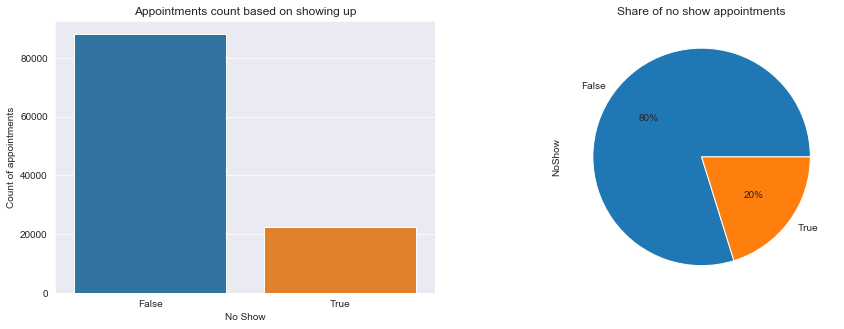

In [31]:
# let's first look at details of individual patient characteristics and of our dependent variable: NoShow

# share of NoShows on all appointments
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
count_plot(df, 'NoShow', 'No Show', 'Count of appointments', 'Appointments count based on showing up')

plt.subplot(1,2,2)
df.NoShow.value_counts().plot(kind='pie',autopct='%1.0f%%')
plt.title('Share of no show appointments')
plt.show()



In [32]:
# calculate total counts of no shows in data
noshow_totals = df.groupby('NoShow').count()['Age']
noshow_totals

NoShow
False    88208
True     22319
Name: Age, dtype: int64

In [33]:
# there are 22319 no shows in the data, which makes 20% of all appointments
noshow_proportion = df['NoShow'].sum() / len(df.index)
noshow_proportion

0.20193255946510807

In [34]:
# the highest correlation is for hypertension and age, hypertension and diabetes, and diabetes and age
df.corr().style.background_gradient(cmap='Blues')

,PatientId,Age,Scholarship,Hypertension,Diabetes,Alcoholism,SMSReceived,NoShow
PatientId,1.000000,-0.004139,-0.002880,-0.006441,0.001605,0.011011,-0.009749,-0.001461
Age,-0.004139,1.000000,-0.092457,0.504586,0.292392,0.095811,0.012643,-0.060319
Scholarship,-0.002880,-0.092457,1.000000,-0.019729,-0.024894,0.035022,0.001194,0.029135
Hypertension,-0.006441,0.504586,-0.019729,1.000000,0.433086,0.087971,-0.006267,-0.035701
Diabetes,0.001605,0.292392,-0.024894,0.433086,1.000000,0.018474,-0.014550,-0.015180
Alcoholism,0.011011,0.095811,0.035022,0.087971,0.018474,1.000000,-0.026147,-0.000196
SMSReceived,-0.009749,0.012643,0.001194,-0.006267,-0.014550,-0.026147,1.000000,0.126431
NoShow,-0.001461,-0.060319,0.029135,-0.035701,-0.015180,-0.000196,0.126431,1.000000


### Age

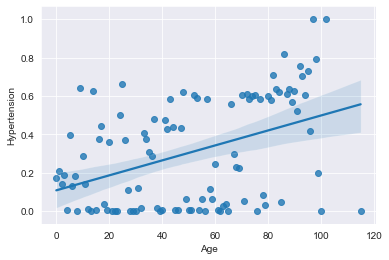

In [35]:
# age hypertension scatter with line fit
# there are more people with hypertension among older patients, as correlation of 0.5 from above suggests
hypertension_mean = df['Hypertension'].groupby(df['Age']).mean()
ages = df['Age'].unique()
sns.regplot(x = ages, y = hypertension_mean)
plt.xlabel('Age')
plt.show()

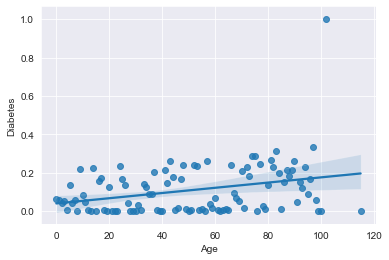

In [36]:
# age diabetes scatter with line fit
# there are more people with diabetes among older patients
diabetes_mean = df['Diabetes'].groupby(df['Age']).mean()
ages = df['Age'].unique()
sns.regplot(x = ages, y = diabetes_mean)
plt.xlabel('Age')
plt.show()

In [37]:
# the outlier is caused by having only one appointment with a patient aged 99 years and this patient is diabetic
df.query('Age >= 99').head(15)

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow
58014,9.762948e+14,F,2016-05-03 09:14:53+00:00,2016-05-03 00:00:00+00:00,102,CONQUISTA,False,False,False,False,0,False,False
63912,3.196321e+13,F,2016-05-16 09:17:44+00:00,2016-05-19 00:00:00+00:00,115,ANDORINHAS,False,False,False,False,1,False,True
63915,3.196321e+13,F,2016-05-16 09:17:44+00:00,2016-05-19 00:00:00+00:00,115,ANDORINHAS,False,False,False,False,1,False,True
68127,3.196321e+13,F,2016-04-08 14:29:17+00:00,2016-05-16 00:00:00+00:00,115,ANDORINHAS,False,False,False,False,1,False,True
76284,3.196321e+13,F,2016-05-30 09:44:51+00:00,2016-05-30 00:00:00+00:00,115,ANDORINHAS,False,False,False,False,1,False,False
79270,9.739430e+12,M,2016-05-30 16:21:56+00:00,2016-05-31 00:00:00+00:00,100,TABUAZEIRO,False,False,False,False,1,False,False
79272,9.739430e+12,M,2016-05-30 16:21:56+00:00,2016-05-31 00:00:00+00:00,100,TABUAZEIRO,False,False,False,False,1,False,False
90372,2.342836e+11,F,2016-05-31 10:19:49+00:00,2016-06-02 00:00:00+00:00,102,MARIA ORTIZ,False,False,False,False,0,False,False
92084,5.578313e+13,F,2016-05-06 14:55:36+00:00,2016-06-03 00:00:00+00:00,100,ANTÔNIO HONÓRIO,False,False,False,False,0,True,False
97647,3.661577e+10,F,2016-06-06 09:46:34+00:00,2016-06-06 00:00:00+00:00,99,SANTO ANTÔNIO,False,True,True,False,0,False,False


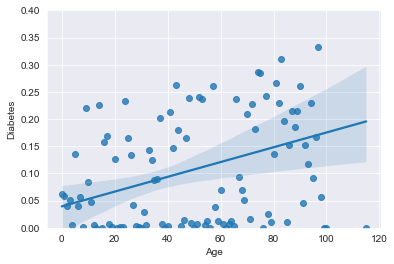

In [38]:
# repeating the above, but cutting out the one outlier appointment to see the correlation better
diabetes_mean = df['Diabetes'].groupby(df['Age']).mean()
ages = df['Age'].unique()
sns.regplot(x = ages, y = diabetes_mean)
plt.xlabel('Age')
plt.ylim(0,0.4)
plt.show()

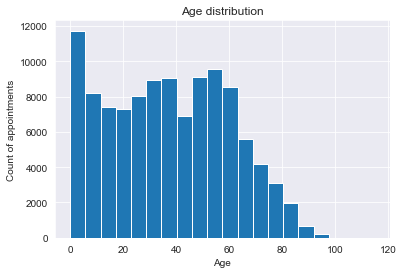

In [39]:
# age distribution
# young people have many appointments, which could be because of a number of mandatory medical visits at that age
g = df.Age.hist(bins=20);
g.set(xlabel = 'Age', ylabel = 'Count of appointments', title = 'Age distribution')
plt.show()

In [40]:
# barplot function
def bar_plot(xdata, ydata, gxlabel, gylabel, gtitle, gerrwidth=None, gpalette=None):
    g = sns.barplot(x = xdata, y = ydata, errwidth = gerrwidth, palette = gpalette)
    g.set(xlabel = gxlabel, ylabel = gylabel, title = gtitle)
    return g

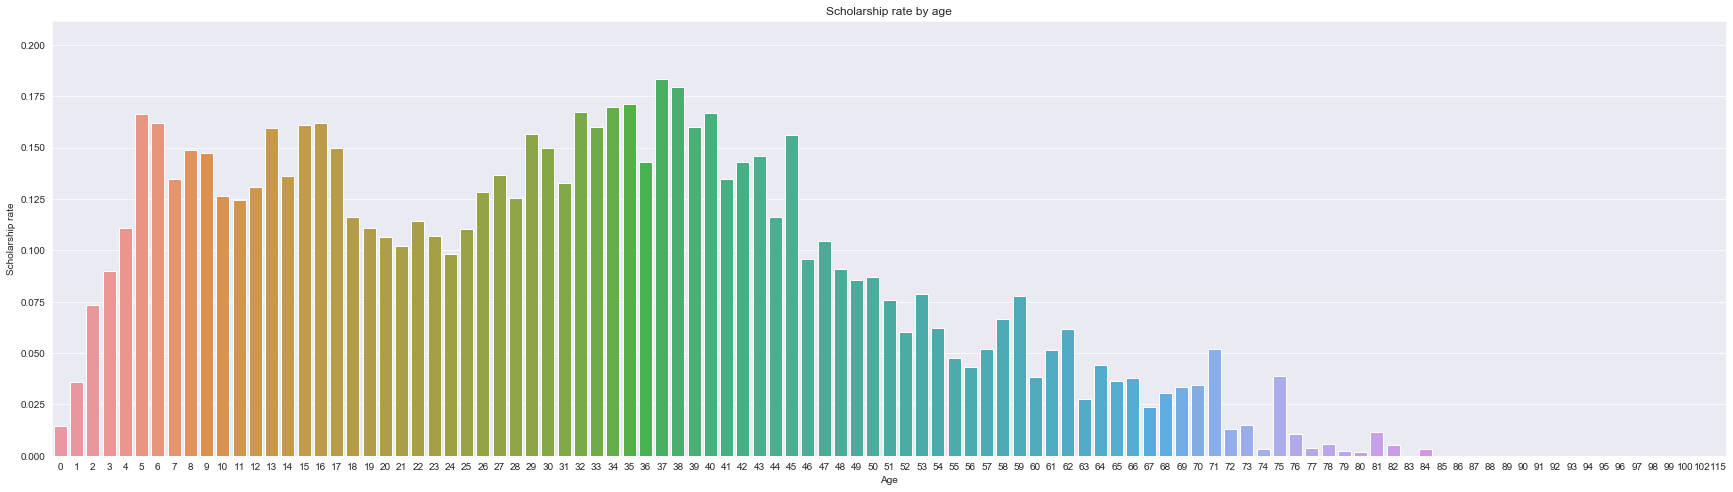

In [41]:
# proportion of appointments of patients on scholarship by age
# it might be the case that scholarship is aimed predominantly at children and parents of children based on the plot
plt.figure(figsize=(30,8))
bar_plot(df['Age'], df['Scholarship'], 'Age', 'Scholarship rate', 'Scholarship rate by age', 0)
plt.show()

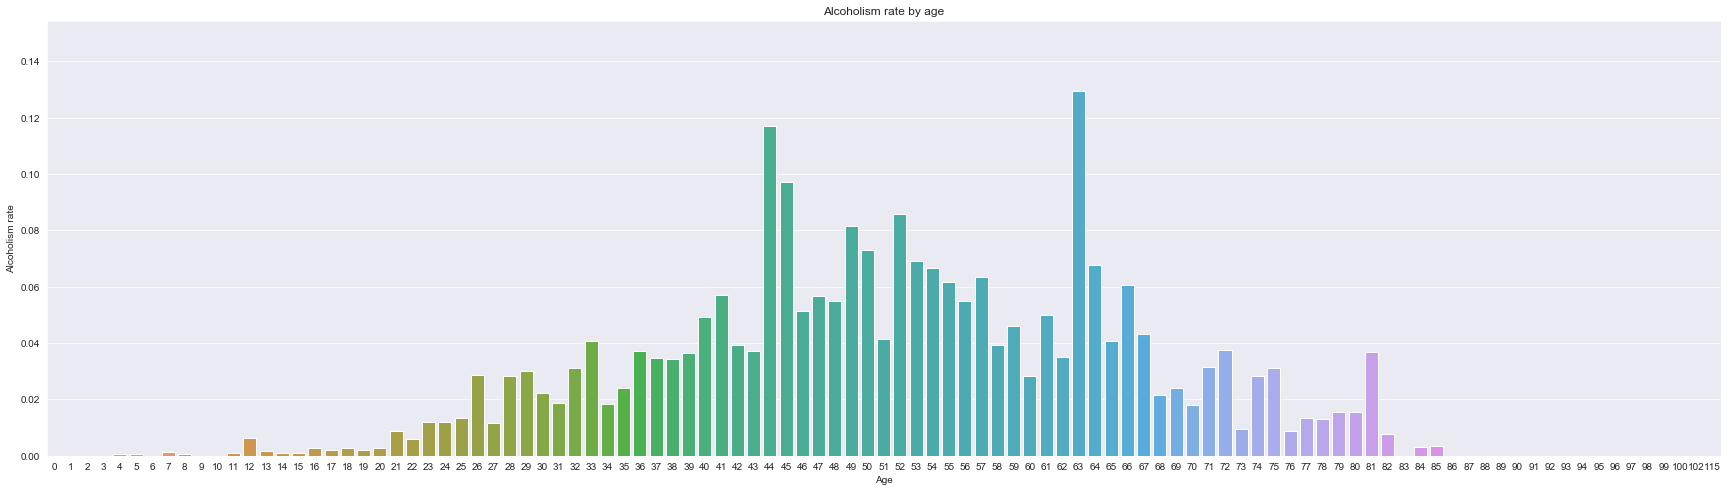

In [42]:
# how alcoholism is distributed among patients scheduling appointments by age
# the most endangered group are patients between their 40s and 60s
plt.figure(figsize=(30,8))
bar_plot(df['Age'], df['Alcoholism'], 'Age', 'Alcoholism rate', 'Alcoholism rate by age', 0)
plt.show()

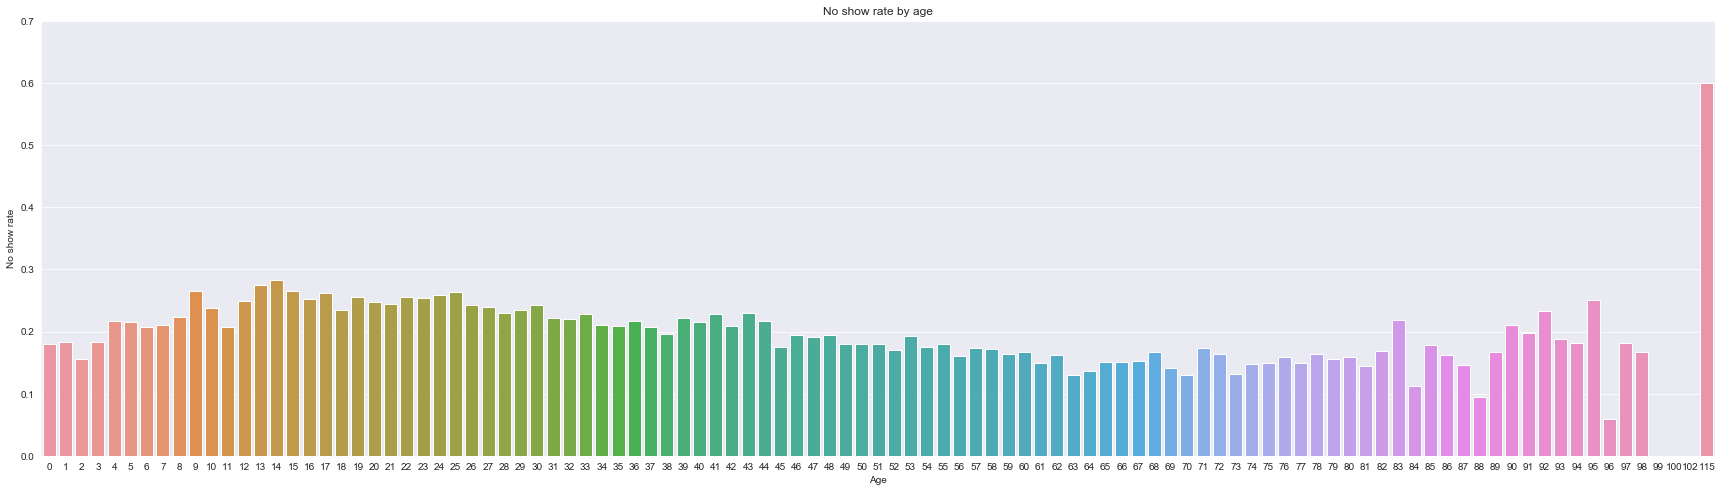

In [43]:
# there seems to be a decreasing no show rate as age increases between ages 15-80
plt.figure(figsize=(30,8))
plt.ylim(0,0.7)
bar_plot(df['Age'], df['NoShow'], 'Age', 'No show rate', 'No show rate by age', 0)
plt.show()

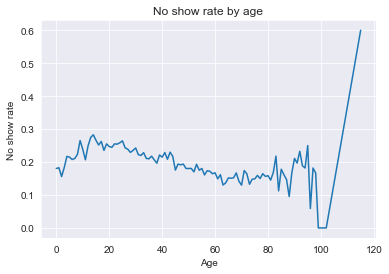

In [44]:
# the above is also confirmed by the following plot
# there are fewer data points for ages higher than 90 (check histogram above), that is why the upper end is so volatile
y_means = df['NoShow'].groupby(df['Age']).mean()
x_age = df['Age'].unique()
x_age = sorted(x_age)
plt.errorbar(x = x_age, y = y_means)
plt.title('No show rate by age')
plt.xlabel('Age')
plt.ylabel('No show rate')
plt.show()

### Handicaps

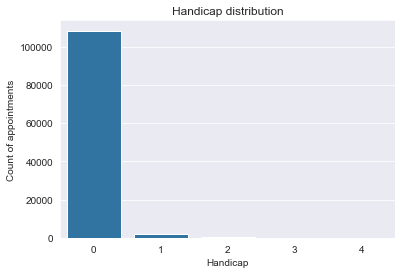

In [45]:
# most appointments are made by patients with no handicap
count_plot(df, 'Handicap', 'Handicap', 'Count of appointments', 'Handicap distribution', sns.color_palette()[0])
plt.show()

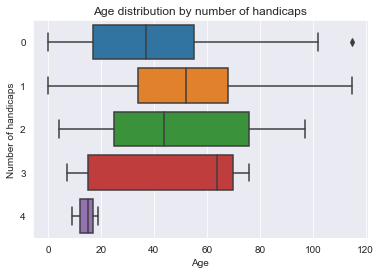

In [46]:
# age distribution for different handicap groups
# age distribution of patients with 4 handicaps is very different because we only have a very small sample of these patients
g = sns.boxplot(data = df, x = 'Age', y = 'Handicap')
g.set(xlabel='Age', ylabel='Number of handicaps', title='Age distribution by number of handicaps')
plt.show()

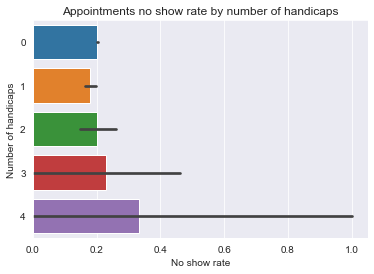

In [47]:
# number of handicaps does not make much of a difference in showing up
# (we can disregard 3 and 4 handicaps because there are just a few data points, as is suggested by the large error bars and distribution chart above)
g = sns.barplot(x = df['NoShow'], y = df['Handicap'])
g.set(xlabel='No show rate', ylabel='Number of handicaps', title='Appointments no show rate by number of handicaps')
plt.show()

### Neighbourhooods

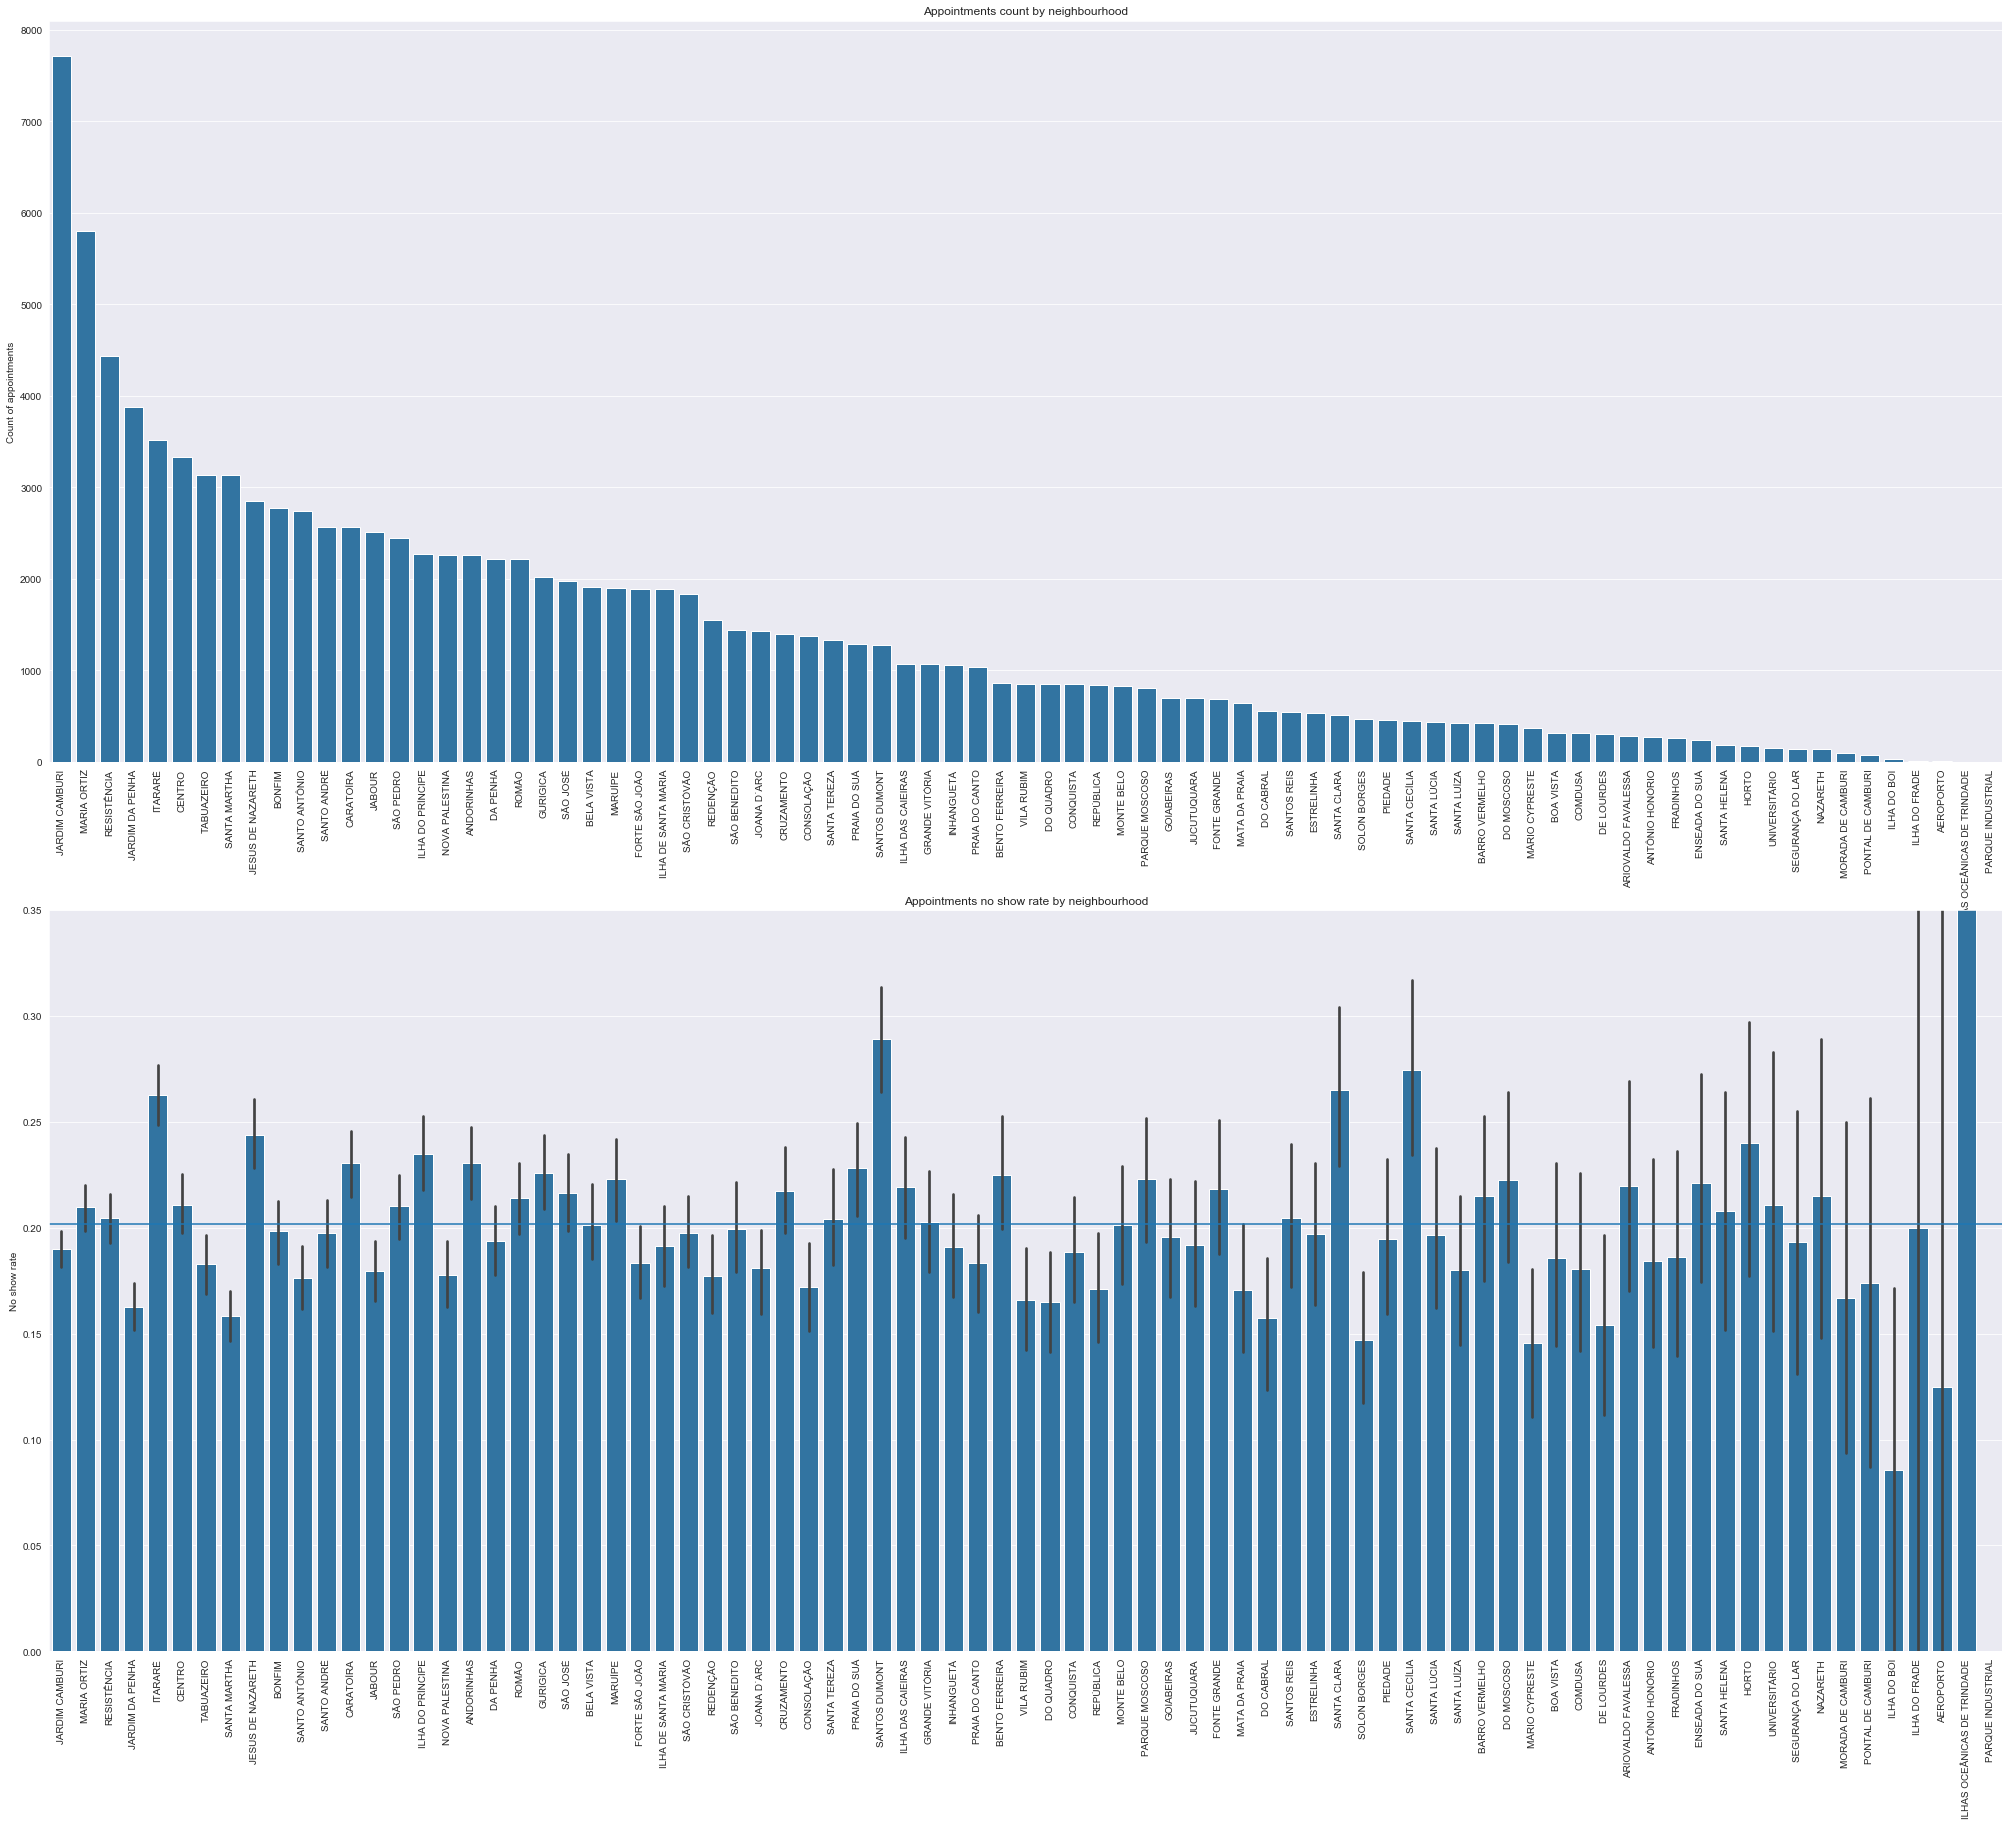

In [48]:
# share of neighbourhoods
# there are a couple of very large neighbourhoods by a number of appointments
plt.figure(figsize=(35,30))

plt.subplot(2, 1, 1)
plt.xticks(rotation=90)
g = sns.countplot(data = df, x = 'Neighbourhood', order = df['Neighbourhood'].value_counts().index, \
                  color=sns.color_palette()[0])
g.set(ylabel = 'Count of appointments', title = 'Appointments count by neighbourhood')

# neighbourhoods do not deviate widely from the overall 20% no show rate
plt.subplot(2, 1, 2)
plt.xticks(rotation=90)
g = sns.barplot(x = df['Neighbourhood'], y = df['NoShow'], order = df['Neighbourhood'].value_counts().index, \
                color=sns.color_palette()[0]);
g.set_title('Appointments no show rate by neighbourhood')
g.set(ylabel='No show rate', ylim=(0,0.35), xlabel='')
g.axhline(noshow_proportion)

plt.show()

### Gender

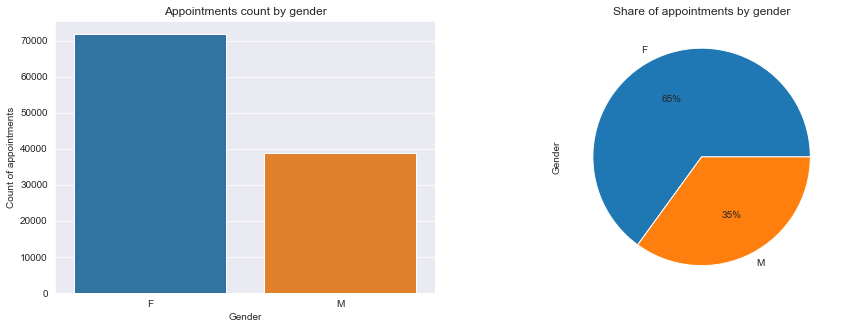

In [49]:
# there are more females scheduling appointments

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
count_plot(df, 'Gender', 'Gender', 'Count of appointments', 'Appointments count by gender')

plt.subplot(1,2,2)
g2 = df.Gender.value_counts().plot(kind='pie',autopct='%1.0f%%')
g2.set(title = 'Share of appointments by gender')

plt.show()

Females seem to be either in more need of medical appointments or simply taking better care of their health.<br>
Let's check below whether this also means that they miss fewer of their appointments than males do.

In [50]:
# number of appointments by gender
gender_totals = df['Gender'].value_counts()
gender_totals

F    71840
M    38687
Name: Gender, dtype: int64

In [51]:
# calculate noshow counts by gender
noshow_by_gender = df.groupby(['Gender', 'NoShow']).count()['Age']
noshow_by_gender

Gender  NoShow
F       False     57246
        True      14594
M       False     30962
        True       7725
Name: Age, dtype: int64

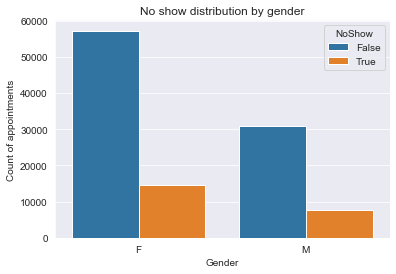

In [52]:
# plotting these counts does not help for distinguishing gender difference in no shows much because 
# there are many more female patients in our data
g = sns.countplot(data = df, x = 'Gender', hue = 'NoShow')
g.set(ylabel = 'Count of appointments', title = 'No show distribution by gender')
plt.show()

In [53]:
# calculating frequencies of noshows for females
noshow_proportions_female = noshow_by_gender['F'] / gender_totals['F']
noshow_proportions_female

NoShow
False    0.796854
True     0.203146
Name: Age, dtype: float64

In [54]:
# calculating frequencies of noshows for males
noshow_proportions_male = noshow_by_gender['M'] / gender_totals['M']
noshow_proportions_male

NoShow
False    0.800321
True     0.199679
Name: Age, dtype: float64

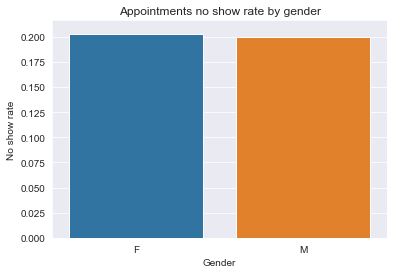

In [55]:
# plot mean of no-show

bar_plot(df['Gender'], df['NoShow'], 'Gender', 'No show rate', 'Appointments no show rate by gender', 0)
plt.show()

There is no large difference in noshow proportion among male and female patients.

Let's now see the distribution of no shows for boolean characteristics:

### Other patient characteristics

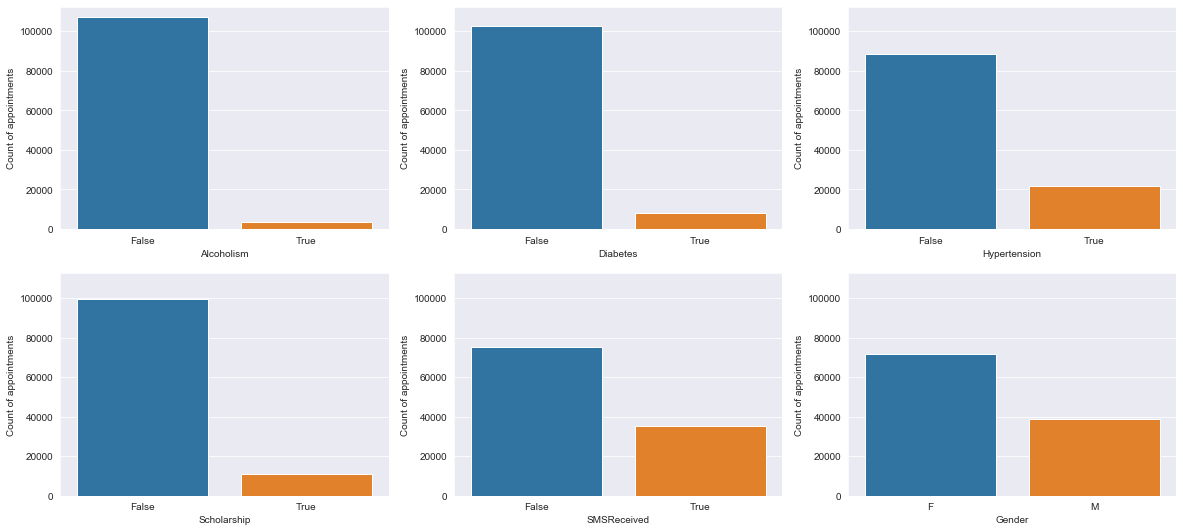

In [56]:
# subplots with amounts of appointments per characteristic value
plt.figure(figsize = [20, 9])

plt.subplot(2, 3, 1)
g1 = count_plot(df, 'Alcoholism', 'Alcoholism', 'Count of appointments', '')

plt.subplot(2, 3, 2)
count_plot(df, 'Diabetes', 'Diabetes', 'Count of appointments', '')
plt.ylim(g1.get_ylim())

plt.subplot(2, 3, 3)
count_plot(df, 'Hypertension', 'Hypertension', 'Count of appointments', '')
plt.ylim(g1.get_ylim())

plt.subplot(2, 3, 4)
count_plot(df, 'Scholarship', 'Scholarship', 'Count of appointments', '')
plt.ylim(g1.get_ylim())

plt.subplot(2, 3, 5)
count_plot(df, 'SMSReceived', 'SMSReceived', 'Count of appointments', '')
plt.ylim(g1.get_ylim())

plt.subplot(2, 3, 6)
count_plot(df, 'Gender', 'Gender', 'Count of appointments', '')
plt.ylim(g1.get_ylim())

plt.show()

Among available boolean characteristics, we can hypothesize the following:<br>
- There is a large number of appointments for which patients were reminded by an SMS, which could decrease the no show rate, let's investigate it below.
- Quite a lot of appointments was made by patients with hypertension and this group could be more likely not to miss the appointment because they need to get their medication regularly. The same could hold for diabetes patients.
- Alcoholism patients could be more likely to miss their appointments due to their addiction issues compared with non-alcoholic patients.<br>

Let's plot no show rates to see what patterns there are in the data.

In [57]:
# plot details function to be used in the following bar charts
def plot_details(plot):
    plot.set(ylim=(0,0.3))
    plot.axhline(noshow_proportion, color='black')
    plt.ylim(g1.get_ylim())

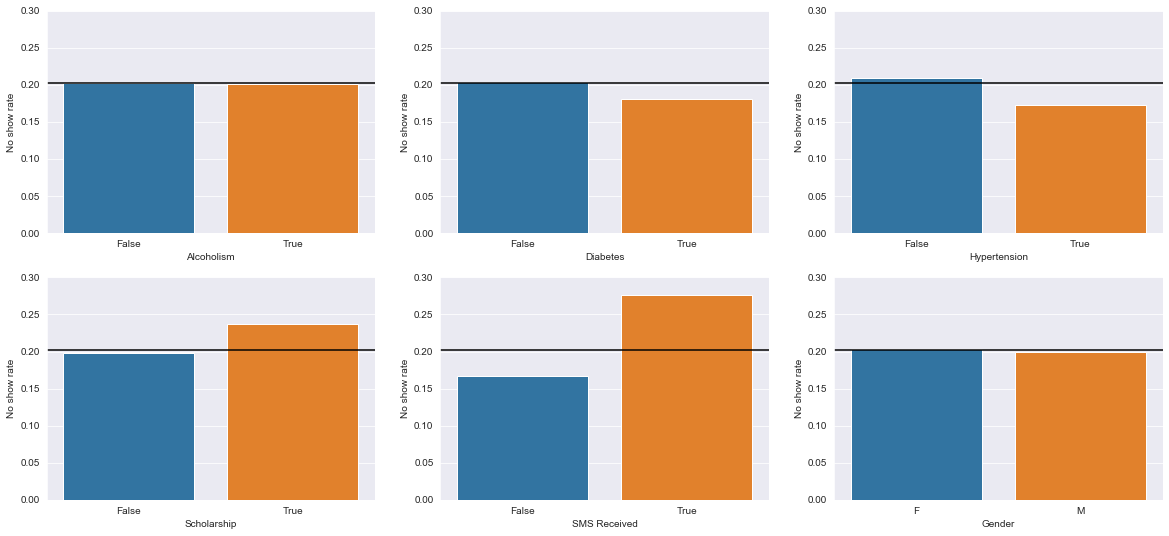

In [58]:
# subplots with no show rates per characteristic
# the overall no show rate is shown by a horizontal line
plt.figure(figsize = [20, 9])

plt.subplot(2, 3, 1)
g1 = bar_plot(df['Alcoholism'], df['NoShow'], 'Alcoholism', 'No show rate', '', 0)
plot_details(g1)

plt.subplot(2, 3, 2)
g2 = bar_plot(df['Diabetes'], df['NoShow'], 'Diabetes', 'No show rate', '', 0)
plot_details(g2)

plt.subplot(2, 3, 3)
g3 = bar_plot(df['Hypertension'], df['NoShow'], 'Hypertension', 'No show rate', '', 0)
plot_details(g3)

plt.subplot(2, 3, 4)
g4 = bar_plot(df['Scholarship'], df['NoShow'], 'Scholarship', 'No show rate', '', 0)
plot_details(g4)

plt.subplot(2, 3, 5)
g5 = bar_plot(df['SMSReceived'], df['NoShow'], 'SMS Received', 'No show rate', '', 0)
plot_details(g5)

plt.subplot(2, 3, 6)
g6 = bar_plot(df['Gender'], df['NoShow'], 'Gender', 'No show rate', '', 0)
plot_details(g6)

plt.show()

The plots reveal the following:<br>
* Alcoholism makes no difference in no show rate.
* Appointments of patients with hypertension or diabetes have lower no show up rate than those without the disease.
* Appointments of patients on scholarship or with a received SMS have higher no show rates than appointments without a scholarship or a received SMS, respectively.

In [59]:
# low no show rate is expected for the below combination of characteristics
combined_issues = df.query('Diabetes == True and Hypertension == True and Handicap > 0')
len(combined_issues)

358

In [60]:
noshows_combined_issues = df.query('NoShow == True and Diabetes == True and Hypertension == True and Handicap > 0')
len(noshows_combined_issues)

55

In [61]:
# the expectation is confirmed
noshow_share_combined_issues = len(noshows_combined_issues) / len(combined_issues)
noshow_share_combined_issues

0.15363128491620112

In [62]:
# high no show rate is expected for the below combination of characteristics
combined_issues2 = df.query('Scholarship == True and SMSReceived == True')
len(combined_issues2)

3505

In [63]:
noshows_combined_issues2 = df.query('NoShow == True and Scholarship == True and SMSReceived == True')
len(noshows_combined_issues2)

1184

In [64]:
# the expectation is confirmed
noshow_share_combined_issues2 = len(noshows_combined_issues2) / len(combined_issues2)
noshow_share_combined_issues2

0.3378031383737518

* When looking at appointments of patients with a handicap, diabetes, and hypertension combined, we see that this group has a no show rate of only 15%.
* On the other hand, appointments of patients on scholarship which also received an SMS have a no show rate of almost 34%.

### <a id='Q2'></a>Q2: Does it matter how long in advance the appointments are being scheduled for the future no-show share?

In [65]:
# count number of days between appointment scheduled day and appointment day
datediff = df['AppointmentDay'] - df['ScheduledDay']
datediff = pd.to_timedelta(datediff,'D')
datediff.describe()

count                      110527
mean       9 days 17:08:34.161960
std       15 days 05:51:27.891504
min             -7 days +10:10:40
25%      -1 days +15:41:31.500000
50%               3 days 11:22:18
75%       14 days 07:41:34.500000
max             178 days 13:19:01
dtype: object

In [66]:
# extract just days from the calculated difference
datediff = round(datediff / np.timedelta64(1, 'D')).astype('int')

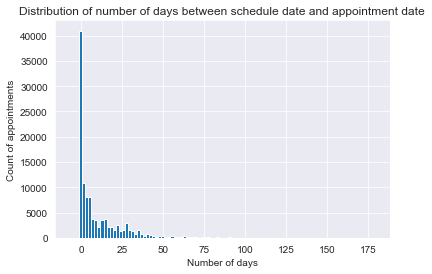

In [67]:
# distribution of date differences - there are many appointments with schedule and appointment at the same day, 
# which means that patients are probably not scheduling in advance
# this would suggest that no shows for day difference equal to 0 should be close to 0%, let's look into it below
datediff.hist(bins=100)
plt.xlabel('Number of days')
plt.ylabel('Count of appointments')
plt.title('Distribution of number of days between schedule date and appointment date')
plt.show()

In [68]:
# merge datediff to df
df['DateDiff'] = datediff

In [69]:
# there are 12161 appointments with negative day difference
len(df.query('DateDiff < 0'))

12161

In [70]:
# almost all of these have difference of -1
len(df.query('DateDiff == -1'))

12158

In [71]:
# this is the case because when the appointment happens on the same date as it is scheduled, the scheduled day includes time, 
# but the appointment date does NOT
# these should therefore be changed to diff = 0
df.query('DateDiff < 0').head()

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow,DateDiff
0,2.987250e+13,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,False,True,False,False,0,False,False,-1
1,5.589978e+14,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,False,False,False,False,0,False,False,-1
2,4.262962e+12,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,False,False,False,False,0,False,False,-1
3,8.679512e+11,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,False,False,False,False,0,False,False,-1
4,8.841186e+12,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,False,True,True,False,0,False,False,-1


In [72]:
# let's change these remaining 3 negative cases to 0, too
df.query('DateDiff < -1').head()

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow,DateDiff
55226,7.896294e+12,F,2016-05-18 14:50:41+00:00,2016-05-17 00:00:00+00:00,19,SANTO ANTÔNIO,False,False,False,False,1,False,True,-2
64175,2.425226e+13,F,2016-05-05 13:43:58+00:00,2016-05-04 00:00:00+00:00,22,CONSOLAÇÃO,False,False,False,False,0,False,True,-2
71533,9.982316e+14,F,2016-05-11 13:49:20+00:00,2016-05-05 00:00:00+00:00,81,SANTO ANTÔNIO,False,False,False,False,0,False,True,-7


In [73]:
# change negative differences to 0 because they must be errors
df['DateDiff'] = df['DateDiff'].clip(lower=0)

In [74]:
# there are 40972 appointments scheduled and happening on the same day
len(df.query('DateDiff == 0'))

40972

In [75]:
# check DateDiff summary 
df['DateDiff'].describe()

count    110527.000000
mean          9.913397
std          15.163468
min           0.000000
25%           0.000000
50%           3.000000
75%          14.000000
max         179.000000
Name: DateDiff, dtype: float64

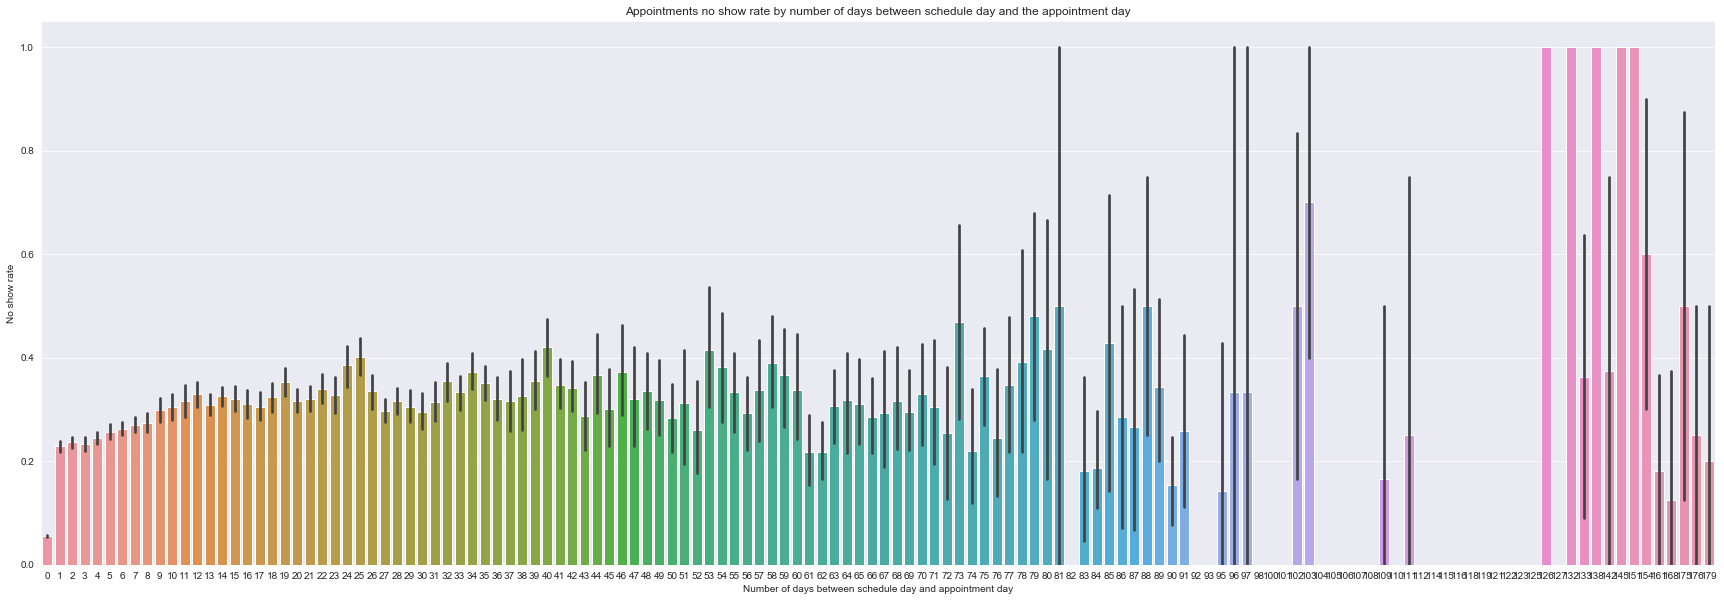

In [76]:
plt.figure(figsize=(30,10))
bar_plot(df['DateDiff'], df['NoShow'], 'Number of days between schedule day and appointment day', 'No show rate', \
         'Appointments no show rate by number of days between schedule day and the appointment day')
plt.show()

It is clear from the above chart that appointments happening on the scheduled day (most of which are probably in reality not being scheduled at all) largely decrease the no show rate to the overall 20%.<br>
Most of the other date difference values have no show rates higher than 20%.<br>

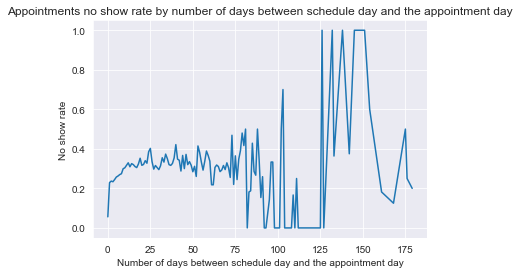

In [77]:
# there are generally fewer data points for date diff higher than 50 (we know that from the histogram higher up),
# that is why the upper end is so volatile
y_means = df['NoShow'].groupby(df['DateDiff']).mean()
x_datediff = df['DateDiff'].unique()
x_datediff = sorted(x_datediff)
plt.errorbar(x = x_datediff, y = y_means)
plt.title('Appointments no show rate by number of days between schedule day and the appointment day')
plt.xlabel('Number of days between schedule day and the appointment day')
plt.ylabel('No show rate')
plt.show()

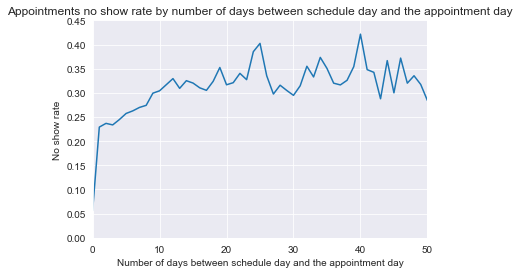

In [78]:
# looking more closely to the relevant part to see the pattern
y_means = df['NoShow'].groupby(df['DateDiff']).mean()
x_datediff = df['DateDiff'].unique()
x_datediff = sorted(x_datediff)
plt.errorbar(x = x_datediff, y = y_means)
plt.title('Appointments no show rate by number of days between schedule day and the appointment day')
plt.xlabel('Number of days between schedule day and the appointment day')
plt.ylabel('No show rate')
plt.xlim(0,50)
plt.ylim(0,0.45)
plt.show()

Looking at this detail, we can say that it seems to matter how long in advance the appointment is scheduled.<br>
The increasing no show rate is visible in the first 20 days of difference. The longer the period between schedule and appointment day, the higher the no show rate in our data generally tends to be.<br>

<br>
Further, knowing that there are almost 41k of 0 days difference values, it might make sense to look again only at a subset which excludes these values, in which we would expect generally higher no show rates than we saw until now.<br>
Let's look at the main no show charts from Q1 and continue further with the shrinked data frame.

In [79]:
# filter 0 diff days out of the data frame
df2 = df.query('DateDiff > 0')
df2.shape

(69555, 14)

In [80]:
# overall no show rate of the shrinked data set is 28.8%
noshow_proportion = df2['NoShow'].sum() / len(df2.index)
noshow_proportion

0.2878729063331177

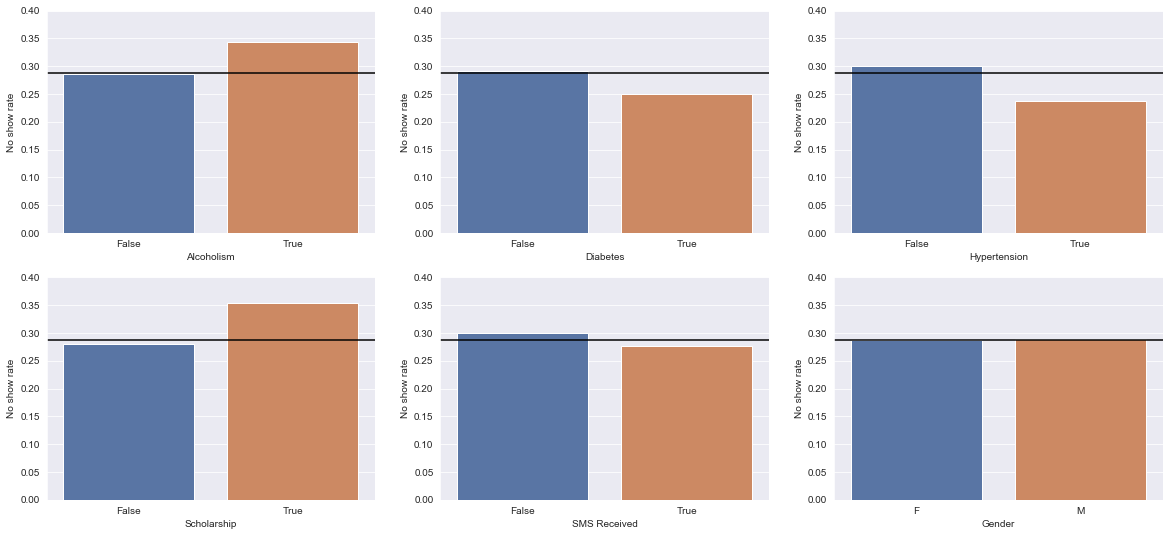

In [81]:
# subplots with no show rates per characteristic
# the overall no show rate is shown by a horizontal line
plt.figure(figsize = [20, 9])

# plot details function to be used in the following bar charts
def plot_details2(plot):
    plot.set(ylim=(0,0.4))
    plot.axhline(noshow_proportion, color='black')
    plt.ylim(g1.get_ylim())

plt.subplot(2, 3, 1)
g1 = bar_plot(df2['Alcoholism'], df2['NoShow'], 'Alcoholism', 'No show rate', '', 0, 'deep')
plot_details2(g1)

plt.subplot(2, 3, 2)
g2 = bar_plot(df2['Diabetes'], df2['NoShow'], 'Diabetes', 'No show rate', '', 0, 'deep')
plot_details2(g2)

plt.subplot(2, 3, 3)
g3 = bar_plot(df2['Hypertension'], df2['NoShow'], 'Hypertension', 'No show rate', '', 0, 'deep')
plot_details2(g3)

plt.subplot(2, 3, 4)
g4 = bar_plot(df2['Scholarship'], df2['NoShow'], 'Scholarship', 'No show rate', '', 0, 'deep')
plot_details2(g4)

plt.subplot(2, 3, 5)
g5 = bar_plot(df2['SMSReceived'], df2['NoShow'], 'SMS Received', 'No show rate', '', 0, 'deep')
plot_details2(g5)

plt.subplot(2, 3, 6)
g6 = bar_plot(df2['Gender'], df2['NoShow'], 'Gender', 'No show rate', '', 0, 'deep')
plot_details2(g6)

plt.show()

Some patterns changed now when we only look at appointments scheduled at least one day in advance.<br>
Appointments of alcoholics are skipped more frequently than the average appointments are.<br>
Receiving an SMS reminder now has a positive effect on no show rate, i.e. appointments with an SMS have lower no show rate than those without a reminder and in general.<br>
Findings for other characteristics did not change.

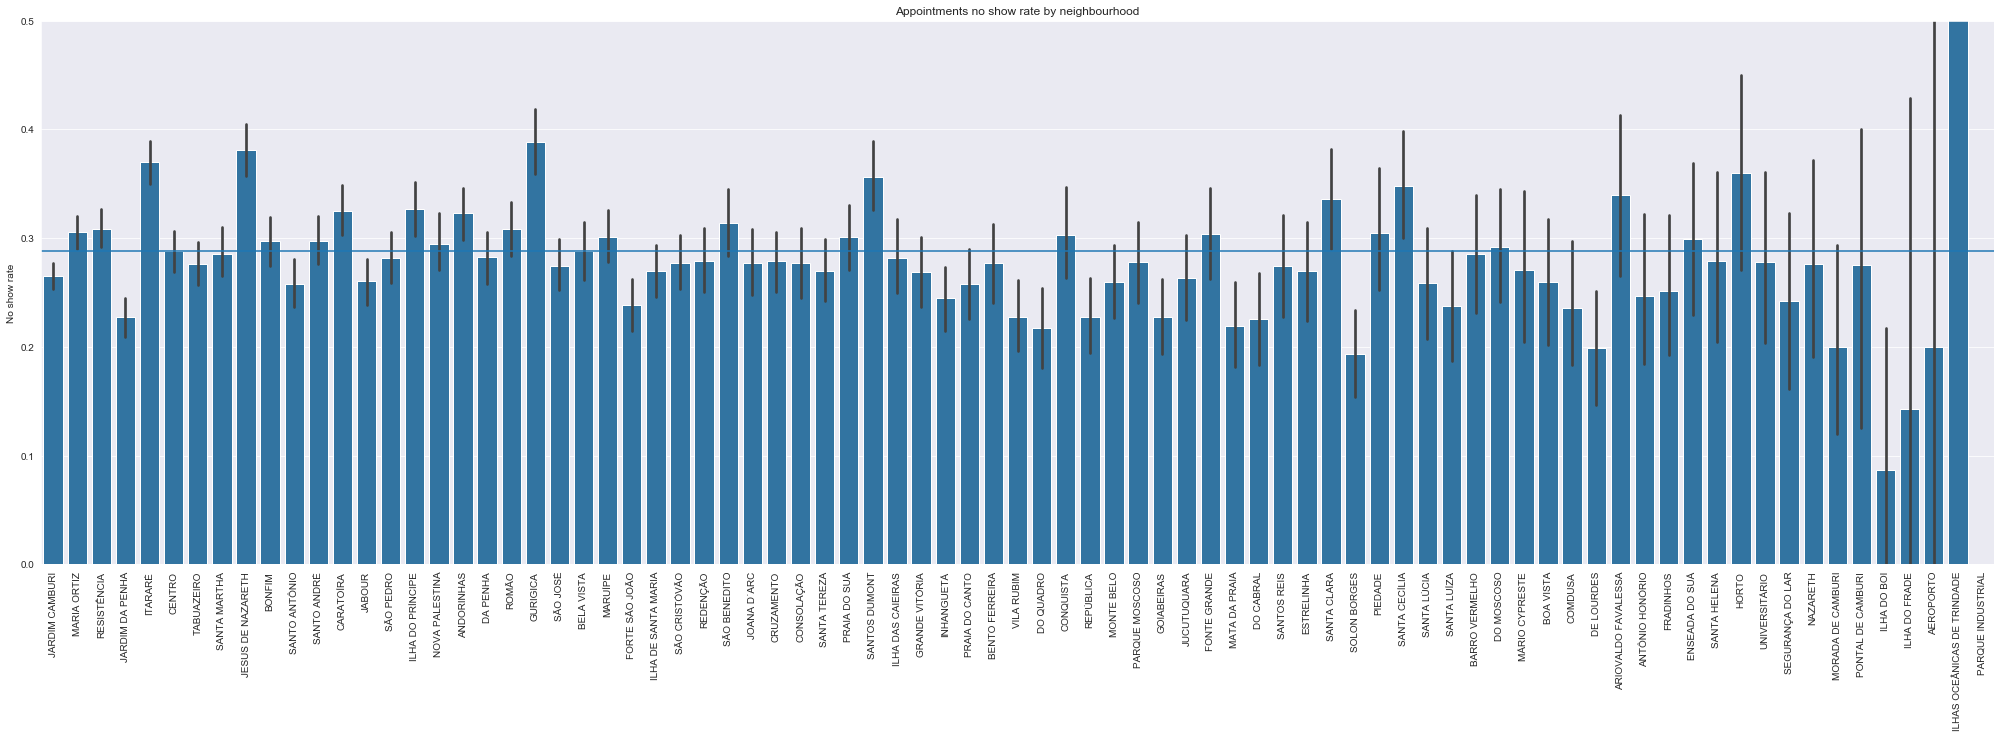

In [82]:
# neighbourhoods still do not deviate widely from the overall no show rate
plt.figure(figsize=(35,10))
plt.xticks(rotation=90)
g = sns.barplot(x = df2['Neighbourhood'], y = df2['NoShow'], order = df['Neighbourhood'].value_counts().index, \
                color=sns.color_palette()[0]);
g.set_title('Appointments no show rate by neighbourhood')
g.set(ylabel='No show rate', ylim=(0,0.5), xlabel='')
g.axhline(noshow_proportion)

plt.show()

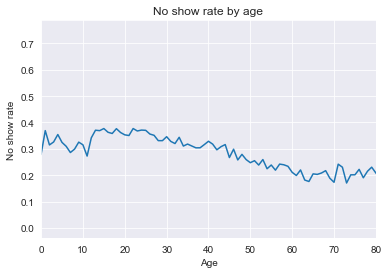

In [83]:
# no show rate still decreases with age in the filtered data
y_means = df2['NoShow'].groupby(df2['Age']).mean()
x_age = df2['Age'].unique()
x_age = sorted(x_age)
plt.errorbar(x = x_age, y = y_means)
plt.title('No show rate by age')
plt.xlabel('Age')
plt.ylabel('No show rate')
plt.xlim(0,80)
plt.show()

###  <a id='Q3'></a>Q3: Are no shows more frequent on Fridays (before the weekend)?

In [84]:
# add appointment day of week to data frame
dow = df2['AppointmentDay'].dt.day_name()
df2 = df2.assign(AppointmentDayOfWeek = dow)
df2.head()

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow,DateDiff,AppointmentDayOfWeek
5,9.598513e+13,F,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,76,REPÚBLICA,False,True,False,False,0,False,False,2,Friday
6,7.336882e+14,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,False,False,False,False,0,False,True,1,Friday
7,3.449833e+12,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,False,False,False,False,0,False,True,1,Friday
9,7.812456e+13,F,2016-04-27 12:48:25+00:00,2016-04-29 00:00:00+00:00,19,CONQUISTA,False,False,False,False,0,False,False,1,Friday
10,7.345362e+14,F,2016-04-27 14:58:11+00:00,2016-04-29 00:00:00+00:00,30,NOVA PALESTINA,False,False,False,False,0,False,False,1,Friday


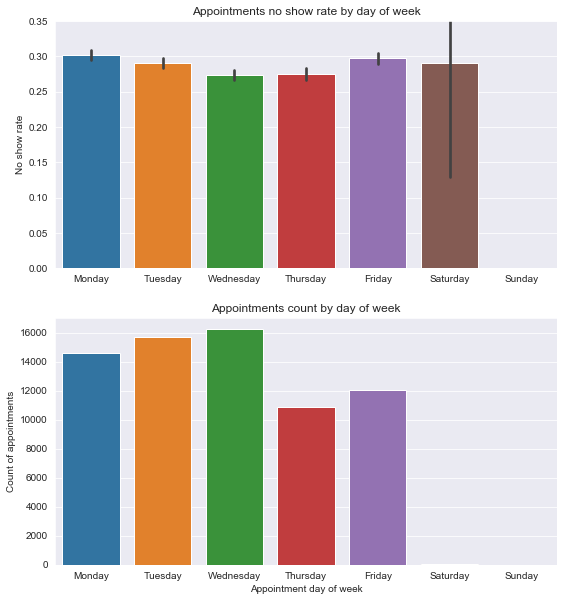

In [85]:
week_key = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize = [9, 10])

plt.subplot(2, 1, 1)
g1 = sns.barplot(x = df2['AppointmentDayOfWeek'], y = df2['NoShow'], order = week_key)
g1.set(xlabel='', ylabel='No show rate', ylim=(0,0.35), title='Appointments no show rate by day of week')

plt.subplot(2, 1, 2)
g2 = sns.countplot(data = df2, x = 'AppointmentDayOfWeek', order = week_key)
g2.set(xlabel='Appointment day of week', ylabel='Count of appointments', title='Appointments count by day of week')

plt.show()

No show rate on Fridays is a bit higher than on Tue, Wed, or Thu, but it is very comparable to no show rate on Mondays.<br>
Mo, Tue, and Wed are the favourite days for appointments.

###  <a id='Q4'></a>Q4: Does sending an SMS reminder help to reduce the no-shows? 

This topic was already covered in overall data exploration in Q1 on the full data set and in Q2 on the filtered data set.<br>
Let's summarize:

In [86]:
# NoShow and SMS received correlation now has a negative sign, but it is quite small
df2.corr().style.background_gradient(cmap='Blues')

,PatientId,Age,Scholarship,Hypertension,Diabetes,Alcoholism,SMSReceived,NoShow,DateDiff
PatientId,1.000000,-0.004521,-0.002145,-0.002676,-0.000331,0.005801,-0.006891,0.003761,0.005174
Age,-0.004521,1.000000,-0.103266,0.500123,0.284006,0.080361,-0.041356,-0.102492,-0.005551
Scholarship,-0.002145,-0.103266,1.000000,-0.027639,-0.025817,0.030758,0.019571,0.046608,-0.028398
Hypertension,-0.002676,0.500123,-0.027639,1.000000,0.424942,0.085314,-0.034695,-0.057317,-0.048467
Diabetes,-0.000331,0.284006,-0.025817,0.424942,1.000000,0.024605,-0.029571,-0.023947,-0.046917
Alcoholism,0.005801,0.080361,0.030758,0.085314,0.024605,1.000000,-0.008762,0.019660,-0.029270
SMSReceived,-0.006891,-0.041356,0.019571,-0.034695,-0.029571,-0.008762,1.000000,-0.027333,0.176027
NoShow,0.003761,-0.102492,0.046608,-0.057317,-0.023947,0.019660,-0.027333,1.000000,0.055927
DateDiff,0.005174,-0.005551,-0.028398,-0.048467,-0.046917,-0.029270,0.176027,0.055927,1.000000


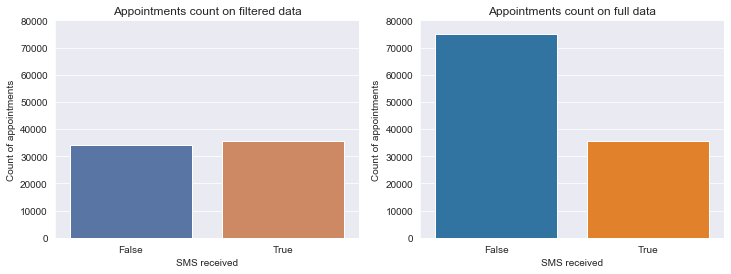

In [87]:
# subplot for comparison with the full data

plt.figure(figsize = (12, 4))

plt.subplot(1, 2, 1)
g1 = count_plot(df2, 'SMSReceived', 'SMS received', 'Count of appointments', 'Appointments count on filtered data', \
                None, 'deep')
g1.set(ylim=(0, 80000))

plt.subplot(1, 2, 2)
g2 = count_plot(df, 'SMSReceived', 'SMS received', 'Count of appointments', 'Appointments count on full data')
plt.ylim(g1.get_ylim())

plt.show()

In [88]:
# 35482 appointments received an SMS
SMS = df2['SMSReceived'].value_counts()
SMS

True     35482
False    34073
Name: SMSReceived, dtype: int64

In [89]:
# that makes around 51% of appointments with a received SMS
# this is much a larger share than on the full data set
SMS_proportion = df2['SMSReceived'].sum() / len(df2.index)
SMS_proportion

0.5101286751491625

We filtered out data with day difference between scheduling and appointment of 0.<br>
These filtered out appointments did not receive an SMS. It makes sense that patients do not get an SMS for appointments on the same day.<br>
The filtered data therefore has much more comparable group sizes for appointments with and without an SMS reminder.

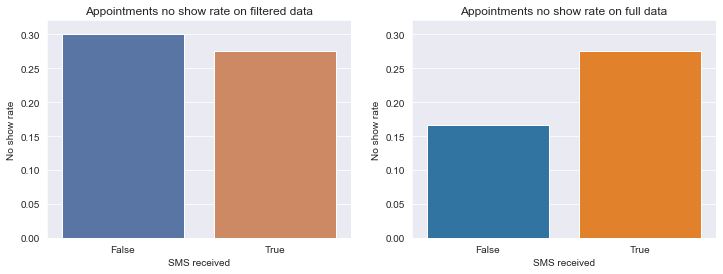

In [90]:
# subplots for comparison
plt.figure(figsize = [12, 4])

plt.subplot(1, 2, 1)
# no show rate for appointments with an SMS reminder is now lower than for appointments with no reminder
g1 = bar_plot(df2['SMSReceived'], df2['NoShow'], 'SMS received', 'No show rate', 'Appointments no show rate on filtered data', \
         0, 'deep')

plt.subplot(1, 2, 2)
g2 = bar_plot(df['SMSReceived'], df['NoShow'], 'SMS received', 'No show rate', 'Appointments no show rate on full data', \
         0)
plt.ylim(g1.get_ylim())

plt.show()

In [91]:
# no show rate for appointments with SMS received
noshow_share_SMS = len(df2.query('NoShow == True and SMSReceived == True')) / len(df2.query('SMSReceived == True'))
noshow_share_SMS

0.27574544839637

In [92]:
# no show rate for appointments with SMS received
show_share_SMS = len(df2.query('NoShow == True and SMSReceived == False')) / len(df2.query('SMSReceived == False'))
show_share_SMS

0.30050186364570186

Appointments no show rate is lower for cases when SMS was sent (27.6%) than for those without a reminder (30%) and also lower than the overall no show rate of 28.8% (for the filtered data set).

<a id='conclusions'></a>
## Conclusions

### Q1: Which groups of patients show up less for their scheduled appointments?
<br>
While doing EDA, it became apparent that it would make sense to look only at data where scheduling and appointment did not happen on the same day. On this reduced data set, the main findings are the following:<br>
- Appointments of alcoholics are skipped more frequently than the average appointments are.<br>
- Appointments of patients with hypertension or diabetes have lower no show up rate than those without the disease.<br>
- Appointments of patients on scholarship have higher no show rates than appointments without a scholarship.<br>
- Receiving an SMS reminder has a positive effect on no show rate, i.e. appointments with an SMS have lower no show rate than those without a reminder and in general.<br>
- Appointments of males and females have very similar no show rates.<br>
- No show rate decreases with age in our dataset.

### Q2: Does it matter how long in advance the appointments are being scheduled for the future no-show share?

Yes, there is an increasing trend of no show rate as the day difference between schedule and appointment day gets larger, especially within the first 20 days.

### Q3: Are no shows more frequent on Fridays (before the weekend)?
Not really. The no show frequency on Fridays is a little higher than average, but very comparable to the one on Mondays.

### Q4: Does sending an SMS reminder help to reduce the no-shows?
Yes, sending an SMS seems to be somewhat helpful in reducing no shows, but the correlation is very small.